In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import MinMaxScaler


# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("satisfaction_data.csv")
print(df.shape)
df.head()

(129880, 26)


,Unnamed: 0.1,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44,satisfied
1,1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0,satisfied
2,2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0,neutral or dissatisfied
3,3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6,satisfied
4,4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Unnamed: 0.1                       129880 non-null  int64 
 1   Unnamed: 0                         129880 non-null  int64 
 2   id                                 129880 non-null  int64 
 3   Gender                             129880 non-null  object
 4   Customer Type                      129880 non-null  object
 5   Age                                129880 non-null  int64 
 6   Type of Travel                     129880 non-null  object
 7   Class                              129880 non-null  object
 8   Flight Distance                    129880 non-null  int64 
 9   Inflight wifi service              129880 non-null  int64 
 10  Departure/Arrival time convenient  129880 non-null  int64 
 11  Ease of Online booking             129880 non-null  

In [4]:
# No imputation needed

In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
# Feature Engineering
# Columns for each subset
meta = ['Unnamed: 0.1', 'Unnamed: 0', 'id']
cat = ['satisfaction','Gender', 'Customer Type', 'Type of Travel', 'Class']
num = ['Age','Flight Distance',  'Departure Delay in Minutes', 'Arrival Delay in Minutes']
surv = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

# Note that 'satisfaction' is the target


In [7]:
# store survey columns for later
df_surv = df.loc[:, surv]

In [8]:
# Examinging the numeric features to see if a scaler is needed
df_num = df.loc[:, num]
df_num.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.045465
std,15.119360,997.452477,38.071126,38.416353
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [9]:
# Scaling Needed
# initialize
scaler = MinMaxScaler(feature_range = (0,5))

# fit
scaler.fit(df_num)

# predict/transform
scaled_data = scaler.transform(df_num)
df_scaled = pd.DataFrame(scaled_data, columns=num)

df_scaled.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,2.884615,0.130250,0.157035,0.138889
1,1.858974,2.859451,0.000000,0.000000
2,0.833333,0.162561,0.000000,0.000000
3,2.371795,3.378433,0.000000,0.018939
4,2.692308,1.162157,0.000000,0.063131


In [10]:
 # Categorical feature engineering
df_cat = df.loc[:, cat]
df_cat.nunique()

satisfaction      2
Gender            2
Customer Type     2
Type of Travel    2
Class             3
dtype: int64

In [11]:
# Label Encoding to be used on Gender, Customer Type, and Type of Travel
# One Encoding to be used on Class

In [12]:
# Label Encode the target
# neutral or dissatisfied:0, satisfied: 1
df_cat['satisfaction'] = df_cat['satisfaction'].apply(lambda x: 0 if x == "neutral or dissatisfied" else 1)
df_cat.head(5)

,satisfaction,Gender,Customer Type,Type of Travel,Class
0,1,Female,Loyal Customer,Business travel,Eco
1,1,Female,Loyal Customer,Business travel,Business
2,0,Male,disloyal Customer,Business travel,Eco
3,1,Male,Loyal Customer,Business travel,Business
4,1,Female,Loyal Customer,Business travel,Eco


In [13]:
# Label Encode Gender
# Male:0, Female:1
df_cat["Gender"] = df_cat.Gender.apply(lambda x: 0 if x == "Male" else 1)
df_cat.head()

,satisfaction,Gender,Customer Type,Type of Travel,Class
0,1,1,Loyal Customer,Business travel,Eco
1,1,1,Loyal Customer,Business travel,Business
2,0,0,disloyal Customer,Business travel,Eco
3,1,0,Loyal Customer,Business travel,Business
4,1,1,Loyal Customer,Business travel,Eco


In [14]:
# Label Encode Customer type
# disloyal Customer:0, Loyal Customer: 1
df_cat["Customer Type"] = df_cat["Customer Type"].apply(lambda x: 0 if x == "disloyal Customer" else 1)
df_cat.head()

,satisfaction,Gender,Customer Type,Type of Travel,Class
0,1,1,1,Business travel,Eco
1,1,1,1,Business travel,Business
2,0,0,0,Business travel,Eco
3,1,0,1,Business travel,Business
4,1,1,1,Business travel,Eco


In [15]:
# Label Encode Type of Travel
# Business travel:0, Personal Travel: 1
df_cat["Type of Travel"] = df_cat["Type of Travel"].apply(lambda x: 0 if x == "Business travel" else 1)
df_cat.head(5)

,satisfaction,Gender,Customer Type,Type of Travel,Class
0,1,1,1,0,Eco
1,1,1,1,0,Business
2,0,0,0,0,Eco
3,1,0,1,0,Business
4,1,1,1,0,Eco


In [16]:
# One hot encode Class
df_cat = pd.get_dummies(df_cat, dtype=int)
df_cat.head()

,satisfaction,Gender,Customer Type,Type of Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,1,1,0,0,1,0
1,1,1,1,0,1,0,0
2,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0
4,1,1,1,0,0,1,0


In [17]:
# Encoding Finished

In [18]:
# Bringing it together
df_final = pd.concat([df_cat, df_num], axis=1)
df_final = pd.concat([df_final, df_surv], axis=1)
df_final.head()

,satisfaction,Gender,Customer Type,Type of Travel,Class_Business,Class_Eco,Class_Eco Plus,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1,1,1,0,0,1,0,52,160,50,44,5,4,3,4,3,4,3,5,5,5,5,2,5,5
1,1,1,1,0,1,0,0,36,2863,0,0,1,1,3,1,5,4,5,4,4,4,4,3,4,5
2,0,0,0,0,0,1,0,20,192,0,0,2,0,2,4,2,2,2,2,4,1,3,2,2,2
3,1,0,1,0,1,0,0,44,3377,0,6,0,0,0,2,3,4,4,1,1,1,1,3,1,4
4,1,1,1,0,0,1,0,49,1182,0,20,2,3,4,3,4,1,2,2,2,2,2,4,2,4


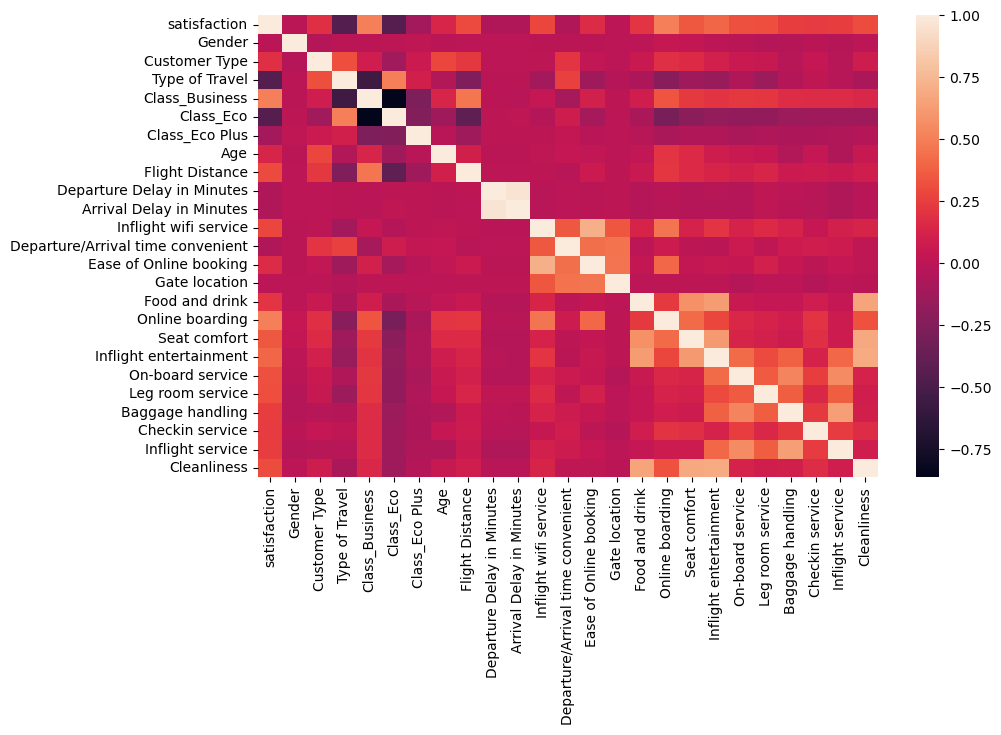

In [19]:
 # Feature selection
# correlation analysis
corrs = df_final.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corrs, annot=False)
plt.show()

In [20]:
abs(corrs.satisfaction).sort_values(ascending=False) 

satisfaction                         1.000000
Class_Business                       0.502476
Online boarding                      0.501749
Type of Travel                       0.449861
Class_Eco                            0.449386
Inflight entertainment               0.398234
Seat comfort                         0.348829
On-board service                     0.322205
Leg room service                     0.312424
Cleanliness                          0.307035
Flight Distance                      0.298085
Inflight wifi service                0.283460
Baggage handling                     0.248680
Inflight service                     0.244918
Checkin service                      0.237252
Food and drink                       0.211340
Customer Type                        0.186017
Ease of Online booking               0.168877
Age                                  0.134091
Class_Eco Plus                       0.106034
Arrival Delay in Minutes             0.058145
Departure/Arrival time convenient 

In [21]:
# Define the training and test sets
X = df_final.drop(columns=["satisfaction"])
y = df_final.satisfaction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(97410, 24) (32470, 24)


In [22]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

In [23]:
# Testing different ML models

TRAIN METRICS
    Confusion Matrix: 
    [[44228 10861]
 [ 7813 34508]]
    
    AUC: 0.8695918790309519

    Classification Report:
                  precision    recall  f1-score   support

           0       0.85      0.80      0.83     55089
           1       0.76      0.82      0.79     42321

    accuracy                           0.81     97410
   macro avg       0.81      0.81      0.81     97410
weighted avg       0.81      0.81      0.81     97410

    
TEST METRICS
    Confusion Matrix: 
    [[14690  3673]
 [ 2537 11570]]
    
    AUC: 0.870355083774212

    Classification Report:
                  precision    recall  f1-score   support

           0       0.85      0.80      0.83     18363
           1       0.76      0.82      0.79     14107

    accuracy                           0.81     32470
   macro avg       0.81      0.81      0.81     32470
weighted avg       0.81      0.81      0.81     32470

    


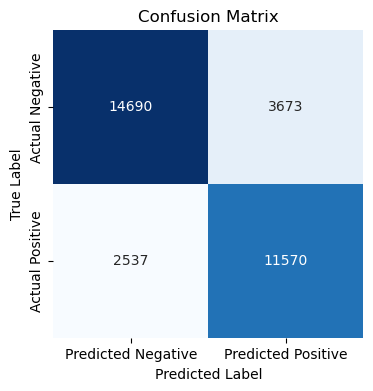

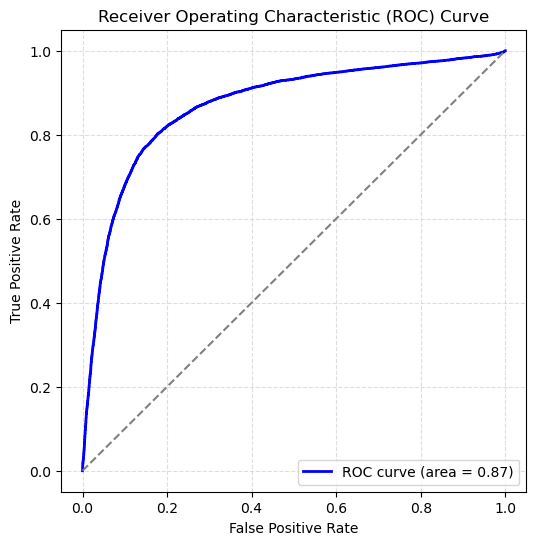

In [24]:
# Logistic Regression
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[55089     0]
 [    0 42321]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     55089
           1       1.00      1.00      1.00     42321

    accuracy                           1.00     97410
   macro avg       1.00      1.00      1.00     97410
weighted avg       1.00      1.00      1.00     97410

    
TEST METRICS
    Confusion Matrix: 
    [[17408   955]
 [  780 13327]]
    
    AUC: 0.9463507740671503

    Classification Report:
                  precision    recall  f1-score   support

           0       0.96      0.95      0.95     18363
           1       0.93      0.94      0.94     14107

    accuracy                           0.95     32470
   macro avg       0.95      0.95      0.95     32470
weighted avg       0.95      0.95      0.95     32470

    


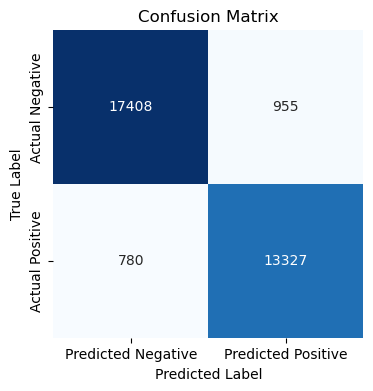

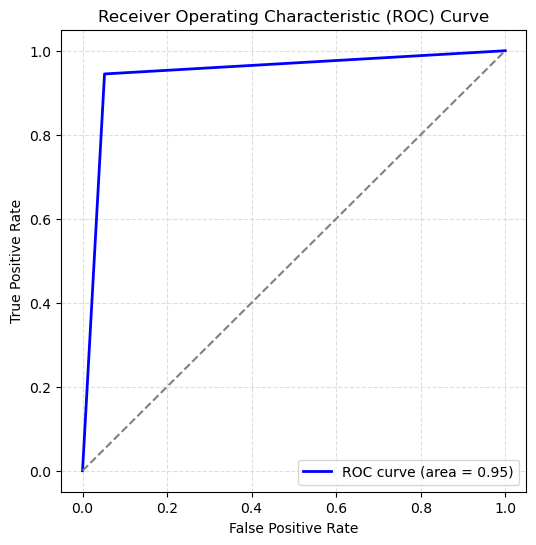

In [25]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[55089     0]
 [    0 42321]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     55089
           1       1.00      1.00      1.00     42321

    accuracy                           1.00     97410
   macro avg       1.00      1.00      1.00     97410
weighted avg       1.00      1.00      1.00     97410

    
TEST METRICS
    Confusion Matrix: 
    [[17946   417]
 [  805 13302]]
    
    AUC: 0.9937970156524705

    Classification Report:
                  precision    recall  f1-score   support

           0       0.96      0.98      0.97     18363
           1       0.97      0.94      0.96     14107

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470

    


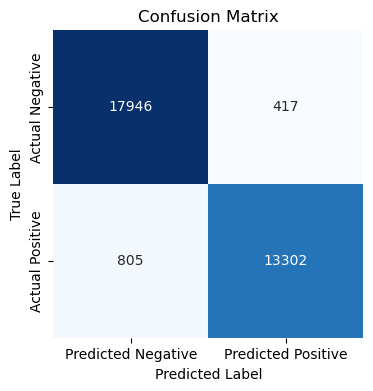

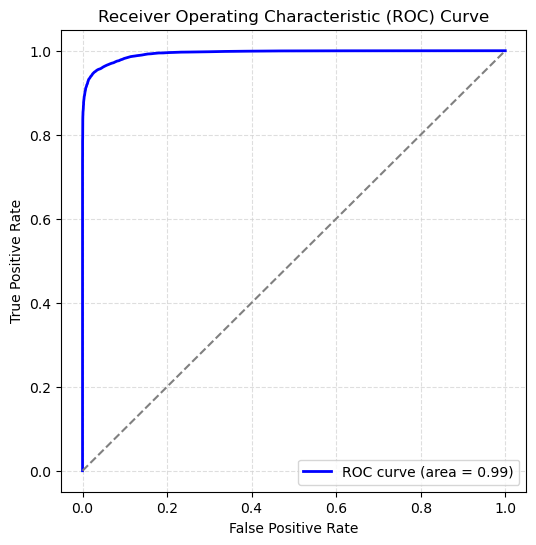

In [26]:
# Random Forest
rf = RandomForestClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[55089     0]
 [    0 42321]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     55089
           1       1.00      1.00      1.00     42321

    accuracy                           1.00     97410
   macro avg       1.00      1.00      1.00     97410
weighted avg       1.00      1.00      1.00     97410

    
TEST METRICS
    Confusion Matrix: 
    [[17922   441]
 [  820 13287]]
    
    AUC: 0.9930628105980261

    Classification Report:
                  precision    recall  f1-score   support

           0       0.96      0.98      0.97     18363
           1       0.97      0.94      0.95     14107

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470

    


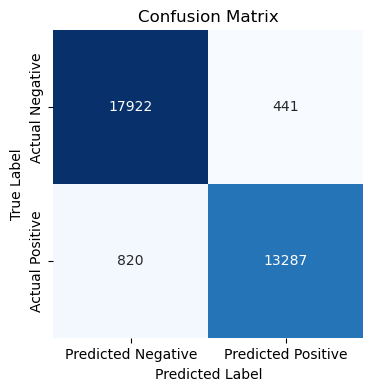

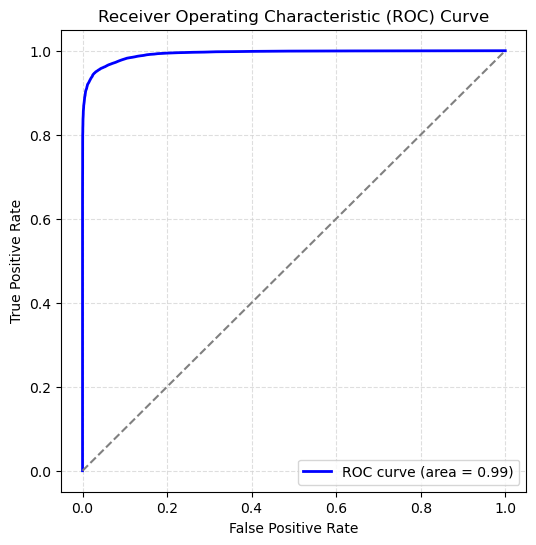

In [27]:
# Extra Trees
et = ExtraTreesClassifier(random_state=42)

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[51885  3204]
 [ 3818 38503]]
    
    AUC: 0.9779078974026596

    Classification Report:
                  precision    recall  f1-score   support

           0       0.93      0.94      0.94     55089
           1       0.92      0.91      0.92     42321

    accuracy                           0.93     97410
   macro avg       0.93      0.93      0.93     97410
weighted avg       0.93      0.93      0.93     97410

    
TEST METRICS
    Confusion Matrix: 
    [[17261  1102]
 [ 1260 12847]]
    
    AUC: 0.9782202613310386

    Classification Report:
                  precision    recall  f1-score   support

           0       0.93      0.94      0.94     18363
           1       0.92      0.91      0.92     14107

    accuracy                           0.93     32470
   macro avg       0.93      0.93      0.93     32470
weighted avg       0.93      0.93      0.93     32470

    


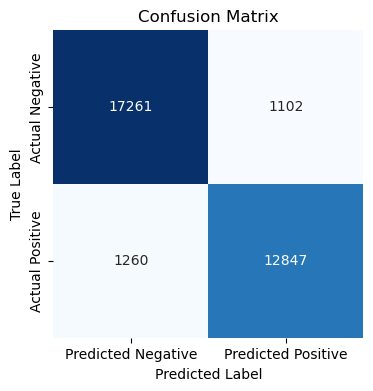

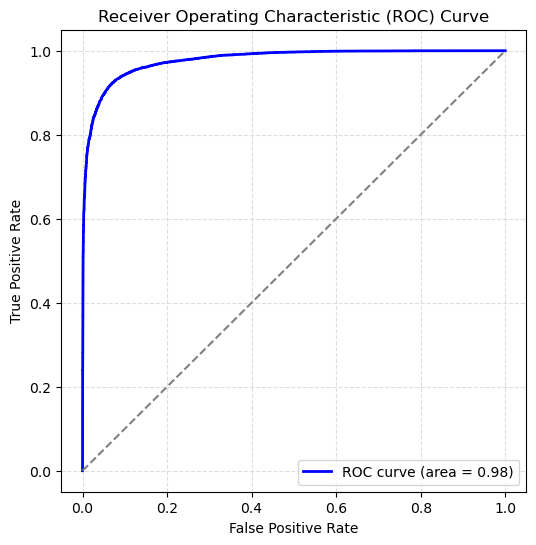

In [28]:
# Ada Boost
ada = AdaBoostClassifier(random_state=42)

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[52818  2271]
 [ 3337 38984]]
    
    AUC: 0.9877380119150815

    Classification Report:
                  precision    recall  f1-score   support

           0       0.94      0.96      0.95     55089
           1       0.94      0.92      0.93     42321

    accuracy                           0.94     97410
   macro avg       0.94      0.94      0.94     97410
weighted avg       0.94      0.94      0.94     97410

    
TEST METRICS
    Confusion Matrix: 
    [[17559   804]
 [ 1106 13001]]
    
    AUC: 0.9875613538170882

    Classification Report:
                  precision    recall  f1-score   support

           0       0.94      0.96      0.95     18363
           1       0.94      0.92      0.93     14107

    accuracy                           0.94     32470
   macro avg       0.94      0.94      0.94     32470
weighted avg       0.94      0.94      0.94     32470

    


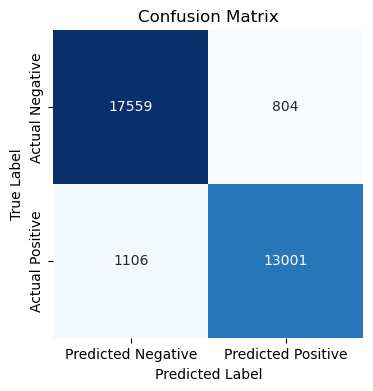

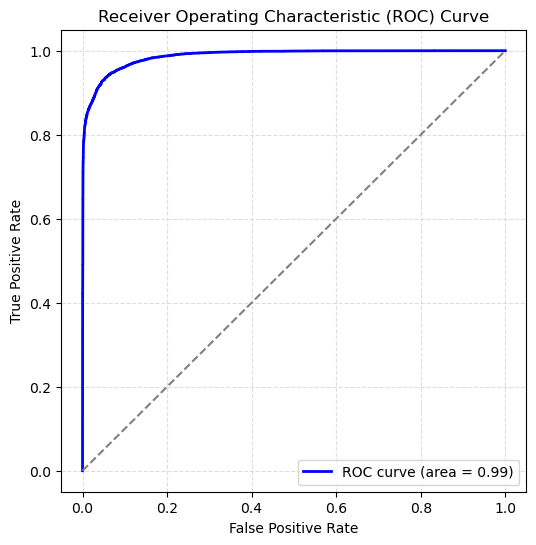

In [29]:
# Gradient Boost
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[54424   665]
 [ 1697 40624]]
    
    AUC: 0.9980491074370772

    Classification Report:
                  precision    recall  f1-score   support

           0       0.97      0.99      0.98     55089
           1       0.98      0.96      0.97     42321

    accuracy                           0.98     97410
   macro avg       0.98      0.97      0.98     97410
weighted avg       0.98      0.98      0.98     97410

    
TEST METRICS
    Confusion Matrix: 
    [[17931   432]
 [  736 13371]]
    
    AUC: 0.9954221445225034

    Classification Report:
                  precision    recall  f1-score   support

           0       0.96      0.98      0.97     18363
           1       0.97      0.95      0.96     14107

    accuracy                           0.96     32470
   macro avg       0.96      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470

    


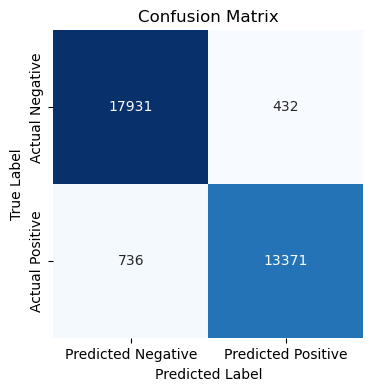

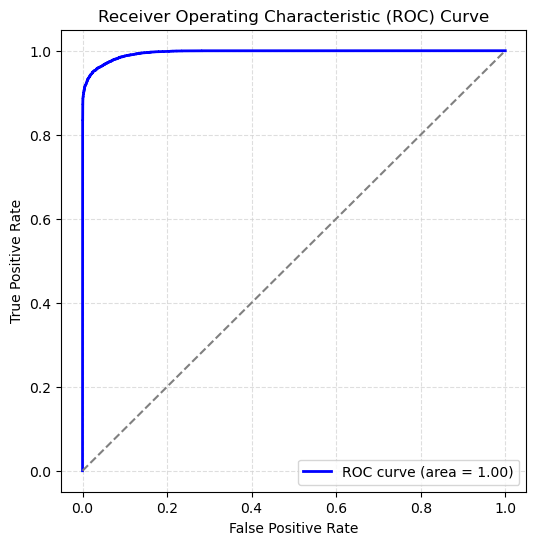

In [30]:
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

In [31]:
# XGB selected to be best model

In [36]:
# Feature Importance Determination
fi = pd.DataFrame(list(zip(X.columns, gb.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
15,Online boarding,0.344954
10,Inflight wifi service,0.244562
2,Type of Travel,0.150089
3,Class_Business,0.114113
17,Inflight entertainment,0.045369
1,Customer Type,0.025604
19,Leg room service,0.020761
21,Checkin service,0.018671
18,On-board service,0.007296
16,Seat comfort,0.005771


In [38]:
# Train the model on the entire dataset
gb = GradientBoostingClassifier(random_state = 42)
gb.fit(X,y)

GradientBoostingClassifier(random_state=42)

In [39]:
 # Save off models
import pickle

# Scaler
pickle.dump(scaler, open("satisfaction_scaler.h5", 'wb'))

# Model
pickle.dump(gb, open("satisfaction_model.h5", 'wb'))